##### Titanic Project - Vinayak Ratan

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

##### All feature details

##### Pclass
    - 1 : upper (1st) class people
    - 2 : middle (2nd) class people
    - 3 : lower (3rd) class people
##### SibSp - siblings 
##### Parch - Parents / Children / Guardian
##### Ticket - ticket number
##### Cabin - cabin number
##### Embarked - journey started from
    - C : Cherbourg
    - Q : Queenstown
    - S : Southampton
##### Survived
    - 1 : survived
    - 0 : not survived

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\dataset1-master\titanic_train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.775,NaN,S


In [6]:
titanic_df.shape

(891, 12)

In [7]:
# The target variable i.e. survived is not in the desired position in the DataFrame, we need to bring it to the required position
target = titanic_df.pop('Survived')

In [8]:
titanic_df.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
157,158,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.05,NaN,S


In [9]:
titanic_df.insert(11,'Survived',target)
titanic_df.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
394,395,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7,G6,S,1


In [10]:
# feature variables datatype
titanic_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [11]:
# basic info about the titanic dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploratory Data Analysis

#### Summary Statistics

In [12]:
titanic_df.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


- Looking at the stats there are null values, outliers and skewness present in the data

#### Checking for null values

In [13]:
# All feature names 
titanic_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [14]:
titanic_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

<AxesSubplot:>

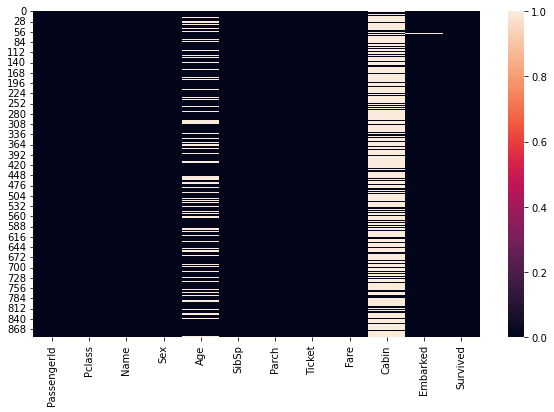

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(titanic_df.isnull())

- Age, Cabin, Embarked have null values
- Age is interger datatype, imputing the null values with mean
- Embarked is also object datatype, with only two rows having null values and imputing it with mode

In [16]:
# Checking for unique values of categorical variables
# Creating a list of categorical variables

cat_titanic = ['Pclass', 'Sex', 'SibSp', 'Parch','Cabin', 'Embarked', 'Survived']

for uq in range(len(cat_titanic)):
    uniq_titanic = titanic_df[cat_titanic[uq]].unique()
    print(f'Unique values for {cat_titanic[uq]}: {uniq_titanic}')
    print(f"--------- Description of {cat_titanic[uq]} categorical variable ----------")
    new_cat = pd.Categorical(titanic_df[cat_titanic[uq]])
    print(new_cat.describe()) # Description of each of the categorical variables
    print('\n')

Unique values for Pclass: [3 1 2]
--------- Description of Pclass categorical variable ----------
            counts     freqs
categories                  
1              216  0.242424
2              184  0.206510
3              491  0.551066


Unique values for Sex: ['male' 'female']
--------- Description of Sex categorical variable ----------
            counts     freqs
categories                  
female         314  0.352413
male           577  0.647587


Unique values for SibSp: [1 0 3 4 2 5 8]
--------- Description of SibSp categorical variable ----------
            counts     freqs
categories                  
0              608  0.682379
1              209  0.234568
2               28  0.031425
3               16  0.017957
4               18  0.020202
5                5  0.005612
8                7  0.007856


Unique values for Parch: [0 1 2 5 3 4 6]
--------- Description of Parch categorical variable ----------
            counts     freqs
categories                  
0     

- Observation
    - Pclass: 3 categories i.e.[3 1 2] (1st class - 216 crew members, 2nd class - 184 crew members, 3rd class - 491 crew members) with crews
    - Sex: Male (314) and female (577)
    - Embarked: 'S'- Southampton, 'C'- Cherbourg, 'Q'- Queenstown and few missing values i.e. nan]
    - Survived: 0: 'Not survived'(549) , 1 : 'survived'(342)

In [17]:
# Cabin have cabin numbers with A,B, C followed by a number. Numbers not matter we only need cabins with characters assigned.
# First converting the data into string
char_cabin = titanic_df['Cabin'].astype(str)

new_cabin = np.array([cabin[0] for cabin in char_cabin])

new_cabin = pd.Categorical(new_cabin)

new_cabin.describe()


,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [18]:
# Assigning the modified 'Cabin' feature details
titanic_df['Cabin'] = new_cabin
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,0


In [19]:
# Find all the passengers who's Age is missing
# np.where gives the index of those missing data 
missing = np.where(titanic_df['Age'].isnull() ==  True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [20]:
# using the index, locate passengers
age_missing = titanic_df.loc[missing] # Gives rows with missing data for Ages column
age_missing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,n,Q,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,n,S,1
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,n,C,1
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,n,C,0
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,n,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,n,C,0
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,n,S,0
868,869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,n,S,0
878,879,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,n,S,0


In [21]:
# Replacing the null values in Age column with mean specific to male and female from Sex column
titanic_df['Age'].fillna(titanic_df.groupby('Sex')['Age'].transform('mean'), inplace = True)

In [22]:
titanic_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,n,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,n,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,n,S,0
5,6,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,n,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,n,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,n,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,n,C,1


In [23]:
# Checking for missiing values after replacing the age column with mean
titanic_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Survived       0
dtype: int64

In [24]:
# There are only two rows with missing data in Embarked, replacing it with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace = True)

In [25]:
titanic_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

<AxesSubplot:>

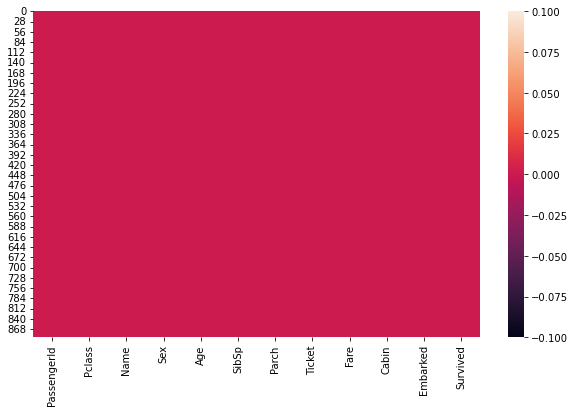

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(titanic_df.isnull()) # verifying the missing values after data cleaning using heatmap

- Now the data is clean with no missing values

In [27]:
titanic_df.isnull().sum().sum()

0

In [28]:
# Finding the maximum fare paid by the crew members onboard
index_fare = np.where(titanic_df['Fare'] == max(titanic_df['Fare']))
index_fare

(array([258, 679, 737], dtype=int64),)

In [29]:
max_fare = titanic_df.loc[index_fare]
max_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,n,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


- All who paid maximum fare onboard survived 

In [30]:
# Finding the family with highest members
# SibSp and Parch are siblings and parents/guardian respectively (add both of them and create new column)

titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
most_family = np.where(titanic_df['Family'] == max(titanic_df['Family']))
titanic_df.loc[most_family]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family
159,160,3,"Sage, Master. Thomas Henry",male,30.726645,8,2,CA. 2343,69.55,n,S,0,10
180,181,3,"Sage, Miss. Constance Gladys",female,27.915709,8,2,CA. 2343,69.55,n,S,0,10
201,202,3,"Sage, Mr. Frederick",male,30.726645,8,2,CA. 2343,69.55,n,S,0,10
324,325,3,"Sage, Mr. George John Jr",male,30.726645,8,2,CA. 2343,69.55,n,S,0,10
792,793,3,"Sage, Miss. Stella Anna",female,27.915709,8,2,CA. 2343,69.55,n,S,0,10
846,847,3,"Sage, Mr. Douglas Bullen",male,30.726645,8,2,CA. 2343,69.55,n,S,0,10
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,27.915709,8,2,CA. 2343,69.55,n,S,0,10


- Family with most members started there journey from 'Southampton' and non of them survived

3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


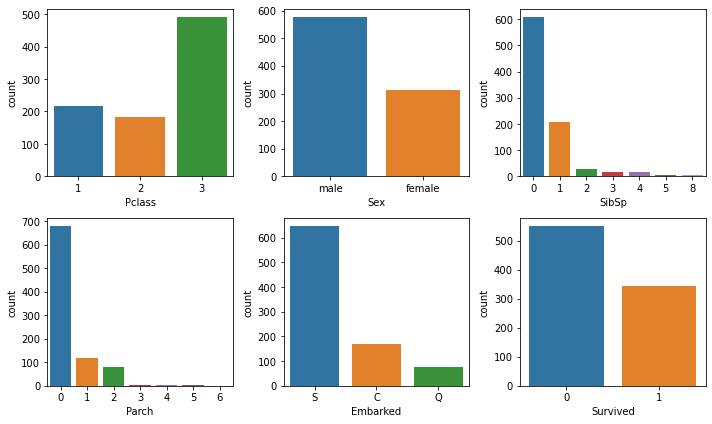

In [31]:
# Creating list of categorical variables
list1 =['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Survived']

plt.figure(figsize=(10,6), facecolor ='white')
plot_no = 1

for c in list1:
    if plot_no <= 6:
        ax = plt.subplot(2,3,plot_no)
        sns.countplot(x = c, data = titanic_df)
        print(titanic_df[c].value_counts())
    plot_no += 1

plt.tight_layout()

- Above plot gives us the count of the categorical variables for different features

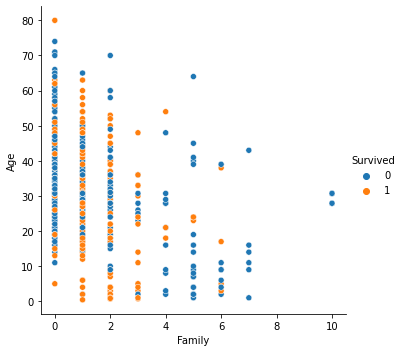

In [32]:
sns.relplot(x= 'Family', y = 'Age', hue = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

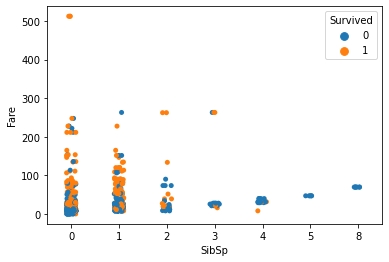

In [33]:
sns.stripplot( x="SibSp", y="Fare", data=titanic_df,hue = 'Survived')

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

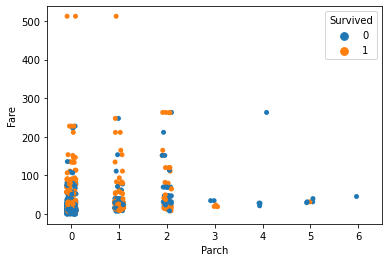

In [34]:
sns.stripplot( x="Parch", y="Fare", data=titanic_df,hue = 'Survived')

<AxesSubplot:xlabel='Family', ylabel='Fare'>

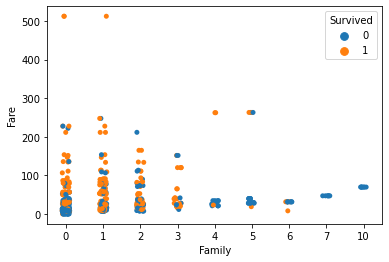

In [35]:
sns.stripplot( x="Family", y="Fare", data=titanic_df,hue = 'Survived')

- most of the crew members with 0, 4 and above died, and family members with 1 to 4 most survived

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

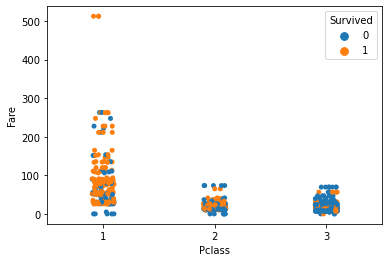

In [36]:
sns.stripplot( x="Pclass", y="Fare", data=titanic_df,hue = 'Survived')

- More survivers with those in 1st class
- In 2nd class and 3rd class most of them died

In [37]:
c = titanic_df.columns

In [38]:
c 

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Family'],
      dtype='object')

In [39]:
cl = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Family']

#### Correlation before feature engineering

In [40]:
titanic_df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Family
PassengerId,1.000000,-0.035144,0.035543,-0.057527,-0.001652,0.012658,-0.005007,-0.040143
Pclass,-0.035144,1.000000,-0.330391,0.083081,0.018443,-0.549500,-0.338481,0.065997
Age,0.035543,-0.330391,1.000000,-0.236920,-0.182556,0.089079,-0.080453,-0.253129
SibSp,-0.057527,0.083081,-0.236920,1.000000,0.414838,0.159651,-0.035322,0.890712
Parch,-0.001652,0.018443,-0.182556,0.414838,1.000000,0.216225,0.081629,0.783111
Fare,0.012658,-0.549500,0.089079,0.159651,0.216225,1.000000,0.257307,0.217138
Survived,-0.005007,-0.338481,-0.080453,-0.035322,0.081629,0.257307,1.000000,0.016639
Family,-0.040143,0.065997,-0.253129,0.890712,0.783111,0.217138,0.016639,1.000000


<AxesSubplot:>

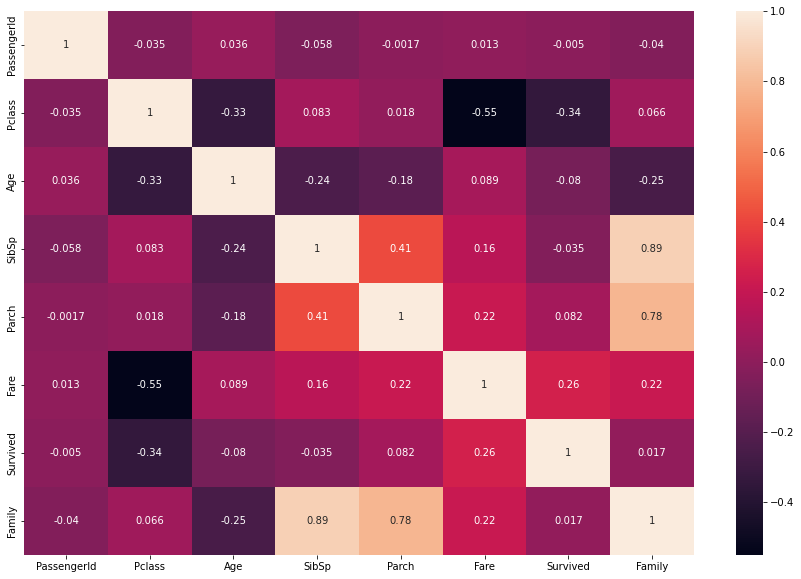

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df.corr(), annot = True)

#### Checking for outliers

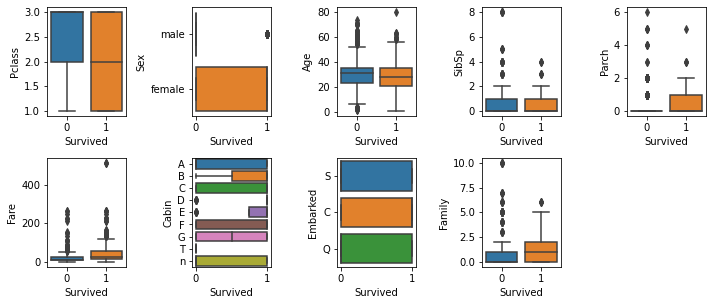

In [42]:
plt.figure(figsize=(10,6), facecolor ='white')
plot_no = 1
for i in cl:
    if plot_no <= 13:
        ax = plt.subplot(3,5,plot_no)
        sns.boxplot(x='Survived', y= i, data = titanic_df )
    plot_no += 1
plt.tight_layout()

- There are outliers present in the dataset and most of the features are categorical except the fare, hence we need to calculate zscore only for fare column

#### Checking for skewness

In [43]:
titanic_df.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.424586
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
Family         2.727441
dtype: float64

In [44]:
titanic_df['Family'] = np.sqrt(titanic_df['Family'])
titanic_df['Fare'] = np.sqrt(titanic_df['Fare'])

In [45]:
titanic_df.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.424586
SibSp          3.695352
Parch          2.749117
Fare           2.085004
Survived       0.478523
Family         1.077973
dtype: float64

#### Correlation after feature engineering

In [46]:
# before finding the correlation, we need shift the survived column to the last
# Also we can drop columns Parch and SibSp, since these two have been added and put into a new column Family
# PassengerId, name and ticket are not necessary for model building for predicting.

titanic_df.drop(titanic_df[['PassengerId','Name','SibSp', 'Parch','Ticket']], axis = 1, inplace = True)

In [47]:
titanic_df.sample()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Family
694,1,male,60.0,5.152669,n,S,0,0.0


In [48]:
target1 = titanic_df.pop('Survived')

In [49]:
titanic_df.insert(7,'Survived',target1)
titanic_df.sample()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Survived
473,2,female,23.0,3.713718,D,C,0.0,1


In [50]:
titanic_df.corr()

,Pclass,Age,Fare,Family,Survived
Pclass,1.000000,-0.330391,-0.660850,-0.027167,-0.338481
Age,-0.330391,1.000000,0.104742,-0.252281,-0.080453
Fare,-0.660850,0.104742,1.000000,0.385575,0.312508
Family,-0.027167,-0.252281,0.385575,1.000000,0.116267
Survived,-0.338481,-0.080453,0.312508,0.116267,1.000000


<AxesSubplot:>

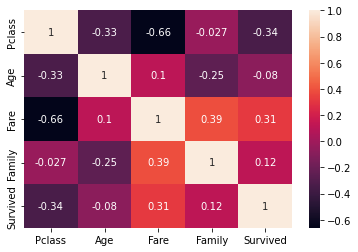

In [51]:
sns.heatmap(titanic_df.corr(), annot = True)

- Pclass is negatively correlated with target variable
- Fare is positively correlated with target variable
- Age and Family have very less correaltion with the target variable, but we will keep them for model building

In [52]:
# Again checking the skewness
titanic_df.skew()

Pclass     -0.630548
Age         0.424586
Fare        2.085004
Family      1.077973
Survived    0.478523
dtype: float64

#### Dividing data in features & vectors

In [53]:
X = titanic_df.iloc[:,:-1]
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,male,22.0,2.692582,n,S,1.0
1,1,female,38.0,8.442944,C,C,1.0
2,3,female,26.0,2.815138,n,S,0.0
3,1,female,35.0,7.286975,C,S,1.0
4,3,male,35.0,2.837252,n,S,0.0


In [54]:
X.dtypes

Pclass         int64
Sex           object
Age          float64
Fare         float64
Cabin       category
Embarked      object
Family       float64
dtype: object

In [55]:
X['Cabin'] = X['Cabin'].astype(str)

In [56]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Cabin        object
Embarked     object
Family      float64
dtype: object

In [59]:
X.shape

(891, 7)

In [57]:
y = titanic_df.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
y.shape

(891,)

#### Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'])

In [63]:
X['Cabin']=le.fit_transform(X['Cabin'])
X['Embarked']=le.fit_transform(X['Embarked'])

In [64]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,22.0,2.692582,8,2,1.0
1,1,0,38.0,8.442944,2,0,1.0
2,3,0,26.0,2.815138,8,2,0.0
3,1,0,35.0,7.286975,2,2,1.0
4,3,1,35.0,2.837252,8,2,0.0


#### Scaling the data using MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms_titanic = MinMaxScaler()
X = mms_titanic.fit_transform(X)
X

array([[1.        , 1.        , 0.27117366, ..., 1.        , 1.        ,
        0.31622777],
       [0.        , 0.        , 0.4722292 , ..., 0.25      , 0.        ,
        0.31622777],
       [1.        , 0.        , 0.32143755, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.34551029, ..., 1.        , 1.        ,
        0.54772256],
       [0.        , 1.        , 0.32143755, ..., 0.25      , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 1.        , 0.5       ,
        0.        ]])

### Model Building

In [66]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [69]:
# Maximum accuracy
maxAccu_t = 0 

# Best random state value for which accuracy is achieved 
maxRS_t = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state=i)
    lg.fit(x_train, y_train)
    lg.score(x_train, y_train)
    pred = lg.predict(x_test)
    print(f'----------------At random State {i} ------------------')
    print("Accuracy score of ", lg, 'is:')
    acc_t = accuracy_score(y_test, pred)
    print(acc_t)
    print('\n')
    
    if acc_t > maxAccu_t:
        maxAccu_t = acc_t
        maxRS_ad = i
        print(f"Maximum accuracy score of {lg} is {acc_t} at Random state {i}")
        print('\n')

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is:
0.8100558659217877


Maximum accuracy score of LogisticRegression() is 0.8100558659217877 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is:
0.8044692737430168


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is:
0.7821229050279329


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is:
0.7653631284916201


----------------At random State 4 ------------------
Accuracy score of  LogisticRegression() is:
0.8379888268156425


Maximum accuracy score of LogisticRegression() is 0.8379888268156425 at Random state 4


----------------At random State 5 ------------------
Accuracy score of  LogisticRegression() is:
0.8212290502793296


----------------At random State 6 ------------------
Accuracy score of  LogisticRegression() is:
0.854748603351955

In [70]:
# Best Accuracy at random state 249
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state=249)
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    pred = m.predict(x_test)
    print(f'----------------{m} ------------------')
    print("Accuracy score of ", m, 'is:')
    acc_t = accuracy_score(y_test, pred)
    print(acc_t)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')

----------------LogisticRegression() ------------------
Accuracy score of  LogisticRegression() is:
0.8603351955307262
[[103  12]
 [ 13  51]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       115
           1       0.81      0.80      0.80        64

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



----------------GaussianNB() ------------------
Accuracy score of  GaussianNB() is:
0.8156424581005587
[[98 17]
 [16 48]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.74      0.75      0.74        64

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



----------------SVC() ------------------
Accuracy score of  SVC() is:
0.821229

#### Cross validation

In [71]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(lg, X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is { max_cvscore}")

At cross fold 2 the cv score is 0.7867536655413916


At cross fold 2 the Maximum CV score is 0.7867536655413916
At cross fold 3 the cv score is 0.7923681257014591


At cross fold 3 the Maximum CV score is 0.7923681257014591
At cross fold 4 the cv score is 0.7923888013574113


At cross fold 4 the Maximum CV score is 0.7923888013574113
At cross fold 5 the cv score is 0.7901261691042623


At cross fold 6 the cv score is 0.7912509825261503


At cross fold 7 the cv score is 0.7901258436445444


At cross fold 8 the cv score is 0.7957187097812097


At cross fold 8 the Maximum CV score is 0.7957187097812097
At cross fold 9 the cv score is 0.7923681257014591


At cross fold 10 the cv score is 0.7979650436953808


At cross fold 10 the Maximum CV score is 0.7979650436953808
At cross fold 11 the cv score is 0.797979797979798


At cross fold 11 the Maximum CV score is 0.797979797979798
At cross fold 12 the cv score is 0.7934834834834836


At cross fold 13 the cv score is 0.7957407043084792


At cro

- Maximum accuracy is at Cross Validation 11

#### Hyper parameter tunning

In [76]:
# Now further using random forest classifier for 
from sklearn.model_selection import GridSearchCV
LogisticRegression()
# creating parameter list to pass i GridSearchCV
parameters = { 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class': ['auto', 'ovr', 'multinomial'],
             'penalty': ['l1', 'l2', 'elasticnet'],
              'C':[100, 10, 1.0, 0.1, 0.01]}

In [77]:
gcv_lg = GridSearchCV(lg,
                     parameters,
                     cv=11,
                     scoring= 'accuracy')

In [78]:
# training
gcv_lg.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [80]:
# Getting the best parameters
gcv_lg.best_params_

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [81]:
gcv_lg.best_estimator_

LogisticRegression(solver='liblinear')

In [82]:
gcv_lg_pred=gcv_lg.best_estimator_.predict(x_test)

print('Final Accuracy with Logistic Regression')
accuracy_score(y_test,gcv_lg_pred)

Final Accuracy with Logistic Regression


0.8379888268156425

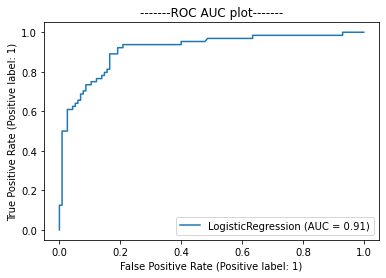

In [83]:
##### ROC ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_lg.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

#### Pickling

In [84]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(gcv_lg.best_estimator_,"Titanic.pkl")

['Titanic.pkl']

In [85]:
titanic_model = joblib.load('Titanic.pkl')
titanic_result = titanic_model.score(x_test, y_test)
print(titanic_result*100)

83.79888268156425


In [86]:
titanic_conclusion = pd.DataFrame([titanic_model.predict(x_test),y_test], index=['Predicted', 'Original'])
titanic_conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0,0,1,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
Original,1,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0


#### Thank You